# Crop DOM/DSM/PCD by ROI

Using region of interest (ROI, e.g. plot boundary), cropping each of them from large digital orthomosaic (DOM), digital surface model (DSM), and point cloud of whole field, without using any GIS or point cloud processing software.

<center><img src="../_static/images/jupyter/crop.png" alt="lotus plot" width="50%"/></center>

## Package and data prepare.

The easiest way to import easyidp package and using the demo exmaple is:

In [1]:
import easyidp as idp

lotus = idp.data.Lotus()

If you run for the first time, it will download 3.3GB dataset automatically from Google Drive, please refer to [Data](../python_api/data.rst) for more details.

## Read ROI from shapefile

The following code will load and open the plot boundary shapefile in the Lotus Dataset, the shp file looks like (red polygons):

<center><img src="../_static/images/data/2017_tanashi_lotus.png" alt="lotus plot" width="61%"/></center>

In [2]:
roi = idp.ROI(lotus.shp, name_field='plot_id')

[shp][proj] Use projection [WGS 84] for loaded shapefile [plots.shp]


Read shapefile [plots.shp]: 100%|██████████| 112/112 [00:00<00:00, 2347.62it/s]


In [3]:
roi

<easyidp.ROI> with 112 items
[0]	N1W1
array([[139.54052962,  35.73475194],
       [139.54055106,  35.73475596],
       [139.54055592,  35.73473843],
       [139.54053438,  35.73473446],
       [139.54052962,  35.73475194]])
[1]	N1W2
array([[139.54053488,  35.73473289],
       [139.54055632,  35.73473691],
       [139.54056118,  35.73471937],
       [139.54053963,  35.73471541],
       [139.54053488,  35.73473289]])
...
[110]	S4E6
array([[139.54090456,  35.73453742],
       [139.540926  ,  35.73454144],
       [139.54093086,  35.7345239 ],
       [139.54090932,  35.73451994],
       [139.54090456,  35.73453742]])
[111]	S4E7
array([[139.54090986,  35.73451856],
       [139.54093129,  35.73452258],
       [139.54093616,  35.73450504],
       [139.54091461,  35.73450107],
       [139.54090986,  35.73451856]])

<div class="alert alert-info">

See also

For more details about the parameter when loading shapefile, please refer to [Load ROI from shapefile](load_roi.ipynb), or python API [easyidp.ROI](../python_api/manualdoc/easyidp.roi.ROI.rst), and [easyidp.shp.read_shp](../python_api/autodoc/easyidp.shp.read_shp.rst).

</div>

## Read and crop geotiff (DOM/DSM)

First, open the DOM geotiff file by:

In [4]:
lotus.metashape.dom

PosixPath('/Users/hwang/Library/Application Support/easyidp.data/2017_tanashi_lotus/170531.Lotus.outputs/170531.Lotus_dom.tif')

In [5]:
dom = idp.GeoTiff(lotus.metashape.dom)

<div class="alert alert-info">

See also

The GeoTiff is easyidp defined class contains several required information. Please check python API [easyidp.GeoTiff](../python_api/autodoc/easyidp.geotiff.GeoTiff.rst) for more information

</div>

However, in this case, the ROI and GeoTiff do not share the same geo-coordinate:

In [6]:
print("ROI.CRS: ", roi.crs.name, "\nDOM.CRS: ", dom.crs.name)

ROI.CRS:  WGS 84 
DOM.CRS:  WGS 84 / UTM zone 54N


Hence need to transform the ROI to the same CRS as GeoTiff, for more details please refer [Load ROI from shapefile](load_roi.ipynb#Transform-between-CRS)

In [7]:
roi.change_crs(dom.crs)

Then using the following function to crop each ROI (plot) from whole field GeoTIff:

In [8]:
dom_parts = roi.crop(dom)

Crop roi from geotiff [170531.Lotus_dom.tif]: 100%|██████████| 112/112 [00:03<00:00, 30.07it/s]


The output `dom_parts` is a dictionary, using plot label as keys and cropped imarray as values:

In [9]:
import matplotlib.pyplot as plt

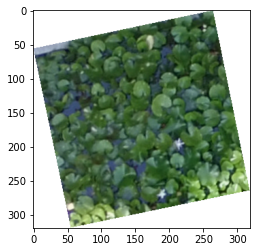

In [10]:
plt.imshow(dom_parts['N1W1'])

It you want to save the cropped GeoTiff, please pass the `save_folder` parameter when cropping

```python
>>> dom_parts = roi.crop(dom, save_folder=r"expected\save\folder")
```

It will save all cropped sections to GeoTiff files with geo-offset (you can overlap the cropped DOM almost perfectly on the original DOM)

<div class="alert alert-info">

Future work

Currently can not just save the single output `dom_parts["N1W1"]` to standard GeoTiff file with correct geo-position without previoud `save_folder` batch saving, but in the future will support save such file directly via `dom_part["N1W1"].save("path\to\save\N1W1.tif")`

</div>

The step to crop DSM is the same as DOM, ignored here.

## Read and crop point cloud

The point cloud also use the same process like GeoTIff

<div class="alert alert-info">

See also

The PointCloud is easyidp defined class contains several required information. Please check python API [easyidp.PointCloud](../python_api/autodoc/easyidp.pointcloud.PointCloud.rst) for more information

</div>

In [11]:
pcd = idp.PointCloud(lotus.metashape.pcd)

Check the point cloud values:

In [12]:
pcd

                   x            y        z  r    g    b        nx      ny      nz
       0  368016.142  3955509.827   94.017  129  132  147  nodata  nodata  nodata
       1  368016.142  3955509.827   94.017  129  132  147  nodata  nodata  nodata
       2  368016.142  3955509.827   94.017  129  132  147  nodata  nodata  nodata
     ...     ...          ...      ...      ...  ...  ...     ...     ...     ...
10158190  368056.169  3955481.725   97.425  174  163  149  nodata  nodata  nodata
10158191  368056.51   3955481.904   97.44   166  153  139  nodata  nodata  nodata
10158192  368056.538  3955481.486   97.447  97   112  72   nodata  nodata  nodata

And cropping:

<div class="alert alert-warning">

Caution

Please ensure the same CRS between ROI and PointCloud.

</div>


In [13]:
pcd_parts = roi.crop(pcd)

Crop roi from point cloud [170531.Lotus.laz]: 100%|██████████| 112/112 [00:30<00:00,  3.61it/s]


The output `pcd_parts` is a dictionary, using plot label as keys and cropped point cloud as values:

In [14]:
pcd_parts["N1W1"]

                x            y        z  r       g       b           nx      ny      nz
    0  368017.889  3955510.812   97.214  nodata  nodata  nodata  nodata  nodata  nodata
    1  368017.888  3955510.8     97.218  nodata  nodata  nodata  nodata  nodata  nodata
    2  368017.897  3955510.964   97.22   nodata  nodata  nodata  nodata  nodata  nodata
  ...     ...          ...      ...      ...     ...     ...        ...     ...     ...
35745  368020.003  3955509.546   97.558  nodata  nodata  nodata  nodata  nodata  nodata
35746  368020.046  3955509.665   97.436  nodata  nodata  nodata  nodata  nodata  nodata
35747  368019.914  3955509.974   97.444  nodata  nodata  nodata  nodata  nodata  nodata

Similarly, you can pass the `save_folder` parameter to save the cropped point cloud

```python
>>> pcd_parts = roi.crop(pcd, save_folder=r"expected\save\folder")
```

Or your can save just one point cloud by:

```python
>>> pcd_part["N1W1"].save(r"path\to\save\N1W1.ply")
```